<a href="https://colab.research.google.com/github/lizchase/Python-Class-Projects/blob/main/Project_2_Elizabeth_Chase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

**Data Exploration**

In [68]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [69]:
df.count()  #That's a lot of columns

encounter_id                101766
patient_nbr                 101766
race                        101766
gender                      101766
age                         101766
weight                      101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                  101766
medical_specialty           101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

In [70]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


**Question: Do younger people spend less time in the hospital than older people when admitted? To do this, I will look at the [20-30] age group compared to the [70-80] age group.**

**Data Cleaning**

In [71]:
df2 = df[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'time_in_hospital', 'readmitted' ]] #Reducing the number of columns
df2.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),1,NO
1,149190,55629189,Caucasian,Female,[10-20),3,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),2,NO
3,500364,82442376,Caucasian,Male,[30-40),2,NO
4,16680,42519267,Caucasian,Male,[40-50),1,NO


In [72]:
df2.isnull().sum()   #Shows there are no missing values in this data set

encounter_id        0
patient_nbr         0
race                0
gender              0
age                 0
time_in_hospital    0
readmitted          0
dtype: int64

In [73]:
for col in df2:
  print(df2[col].unique())   #This shows that there are still values in the race and gender column that will need updating or dropping if those columns are used.

[  2278392    149190     64410 ... 443854148 443857166 443867222]
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
['Female' 'Male' 'Unknown/Invalid']
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
['NO' '>30' '<30']


In [74]:
age_clean = {                    #Cleaning up age data to show consistent brackets
    '[0-10)': '[0-10]',          #https://saturncloud.io/blog/how-to-replace-values-on-specific-columns-in-pandas/
    '[10-20)': '[10-20]',
    '[20-30)': '[20-30]',
    '[30-40)': '[30-40]',
    '[40-50)': '[40-50]',
    '[50-60)': '[50-60]',
    '[60-70)': '[60-70]',
    '[70-80)': '[70-80]',
    '[80-90)': '[80-90]',
    '[90-100)': '[90-100]'
}

def clean_age_column(age):
  return age_clean.get(age, age)

df3 = df.copy()
df3['age'] = df3['age'].apply(clean_age_column)

df3.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10],?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20],?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30],?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40],?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50],?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Analysis**

Text(0.5, 9.444444444444438, 'Days in Hospital')

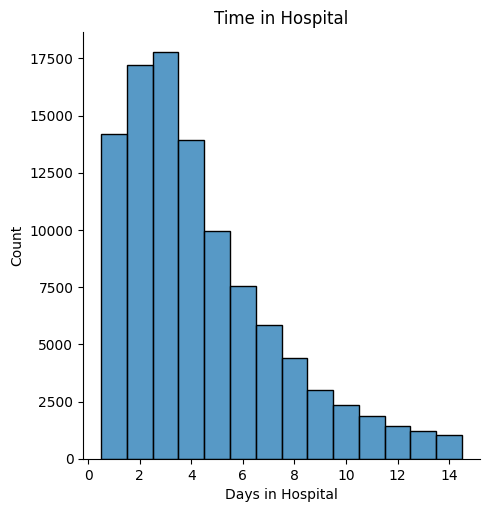

In [75]:
sns.displot(df3['time_in_hospital'], discrete=True)  #Simple histogram showing distribution of time in hospital overall.
plt.title("Time in Hospital")
plt.xlabel("Days in Hospital")

In [76]:
df_age_mean = df3.groupby(['age'])['time_in_hospital'].mean().reset_index()    #Mean days in hospital by age range.
df_age_mean                                              #.reset_index() makes using Seaborn possible with a groupby function

,age,time_in_hospital
0,[0-10],2.546584
1,[10-20],3.191027
2,[20-30],3.564876
3,[30-40],3.799735
4,[40-50],4.039649
5,[50-60],4.125753
6,[60-70],4.382244
7,[70-80],4.590878
8,[80-90],4.808629
9,[90-100],4.755818


In [77]:
df_age_median = df3.groupby(['age'])['time_in_hospital'].median().reset_index()    #Median days in hospital by age range.
df_age_median

,age,time_in_hospital
0,[0-10],2.0
1,[10-20],2.0
2,[20-30],3.0
3,[30-40],3.0
4,[40-50],3.0
5,[50-60],3.0
6,[60-70],4.0
7,[70-80],4.0
8,[80-90],4.0
9,[90-100],4.0


Text(0, 0.5, 'Average Days')

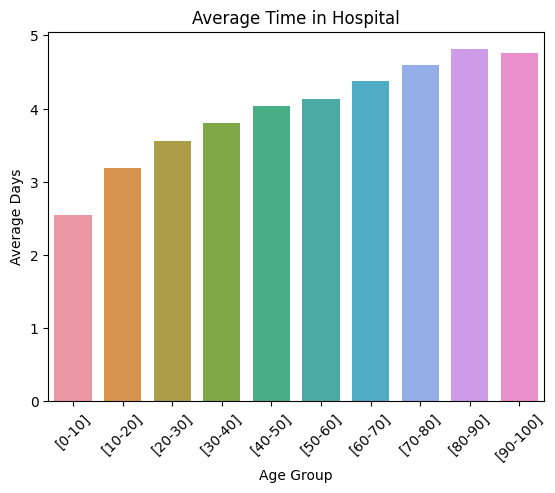

In [78]:
with plt.style.context("seaborn-v0_8-muted"):
  sns.barplot(x='age', y='time_in_hospital', data=df_age_mean, width=.75) #Shows the average days in hospital broken down by age group.
plt.title("Average Time in Hospital")
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Average Days")

#https://mljar.com/blog/matplotlib-colors/

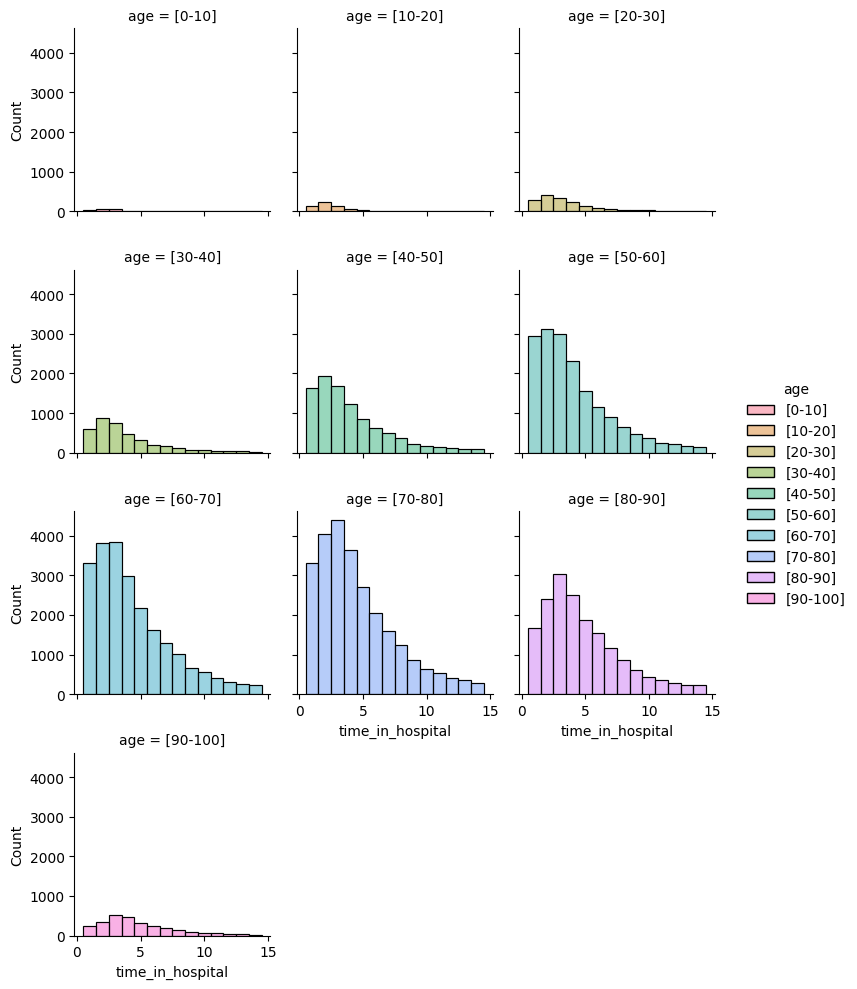

In [79]:
with plt.style.context("seaborn-v0_8-muted"):
  g = sns.displot(data=df3, x='time_in_hospital', col='age', col_wrap=3, height=2.5, discrete=True, hue='age')
#https://stackoverflow.com/questions/72662190/how-to-plot-histogram-subplots-for-each-group
#Shows that the data for each age group is positively skewed having a long right tail.

Text(0, 0.5, 'Days')

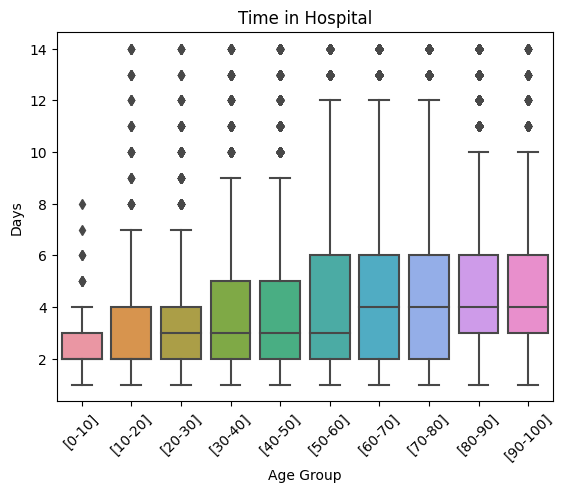

In [80]:
with plt.style.context("seaborn-v0_8-muted"):
  sns.boxplot(x='age', y='time_in_hospital', data=df3)

plt.title("Time in Hospital")
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Days")

#Shows there are a number of outliers in the data.
#The median will necessarily be an integer as this data is discrete.
#https://medium.com/@polanitzer/boxplot-in-python-understand-your-data-better-using-seaborn-library-7e73aa7c0454

**Conclusion**
Both the mean and median number of days in the hospital are lower for the [20-30] age group compared to the [70-80] age group.

We also find that those in the [80-90] age group spend the most time in the hospital when comparing means. However, the median number of days in the hospital is the same for all age groups 60+.

Side Note:
This data is positively skewed both overall and for each age group. The mean will always be higher than the median.  The box plot shows a number of outliers. It would be interesting to remove these outliers and see if/how this affects the analysis.